# English to French Translation

In [ ]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import csv

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from wordcloud import WordCloud


In [ ]:
# Getting the data

df = pd.read_csv("/content/Sentence pairs in French-English - 2021-10-27.tsv", sep='\t', header = None )
df = df.set_axis(['A', 'FR', 'B', 'EN'], axis=1, inplace=False)
df = df[["EN", "FR"]]


In [ ]:
# set the number of unique french and english tokens to consider
n_eng_unique = 15000
n_french_unique = 15000

In [ ]:
# preprocessing for english sentences

english_sentences = df["EN"]

eng_tokenizer = Tokenizer(num_words = n_eng_unique, lower= 1, oov_token="<OOV>")
eng_tokenizer.fit_on_texts(english_sentences)
eng_word_index = eng_tokenizer.word_index
english_sequences = eng_tokenizer.texts_to_sequences(english_sentences)         # This is a list
num_eng_tokens = len(eng_word_index)
eng_reverse_index = {v: k for k, v in eng_word_index.items()}

In [ ]:
print(eng_word_index)
print("The number of unique tokens in english : " + str(len(eng_word_index)))
print("Total number of english sentences : "+ str(len(english_sequences)))

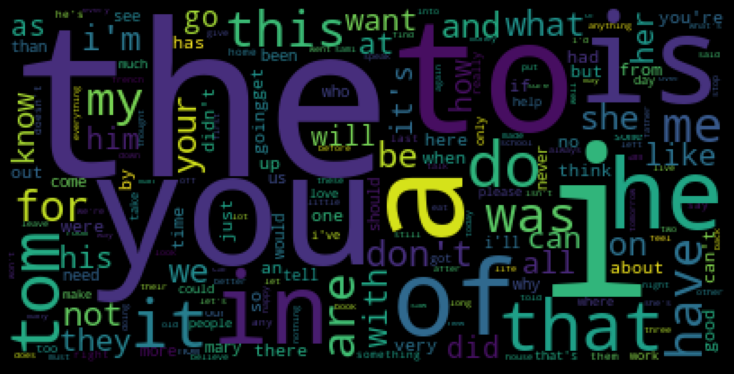

In [ ]:
# word cloud

eng_word_freq = eng_tokenizer.word_counts
word_cloud = WordCloud().generate_from_frequencies(frequencies=eng_word_freq)
plt.figure(figsize = (10, 10), facecolor = 'k', edgecolor = 'k' ) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [ ]:
english_sentences.head()

0    When he asked who had broken the window, all t...
1    Then, when he asked who had broken the window,...
2                           I can't abide that fellow.
3                            I can't bear that fellow.
4                              I can't stand that guy.
Name: EN, dtype: object

In [ ]:
english_sequences[0:5]

[[71, 10, 218, 78, 61, 739, 2, 481, 41, 2, 921, 181, 31, 59, 678, 8, 3560],
 [396, 71, 10, 218, 78, 61, 739, 2, 481, 41, 2, 921, 2023, 1230],
 [3, 67, 4587, 11, 3426],
 [3, 67, 1145, 11, 3426],
 [3, 67, 546, 11, 717]]

Since the French sentences are used as output variables, while decoding the sentences using LSTMs/RNNs, they need a dummy words to off-set

In [ ]:
# Preprocessing for French sentences

start_word = "SSSS"
end_word = "DDDD"

df["FR"] = df["FR"].apply(lambda x: "SSSS " + x +" DDDD")
french_sentences = df["FR"]
french_tokenizer = Tokenizer(num_words = n_french_unique, lower = 1, oov_token = "<OOVF")
french_tokenizer.fit_on_texts(french_sentences)
french_word_index = french_tokenizer.word_index

french_sequences = french_tokenizer.texts_to_sequences(french_sentences)         # This is a list
num_french_tokens = len(french_word_index)
french_reverse_index = {v: k for k, v in french_word_index.items()}

In [ ]:
print(french_word_index)
print("The number of unique tokens in French : " + str(len(french_word_index)))
print("Total number of french sentences : " + str(len(french_sequences)))

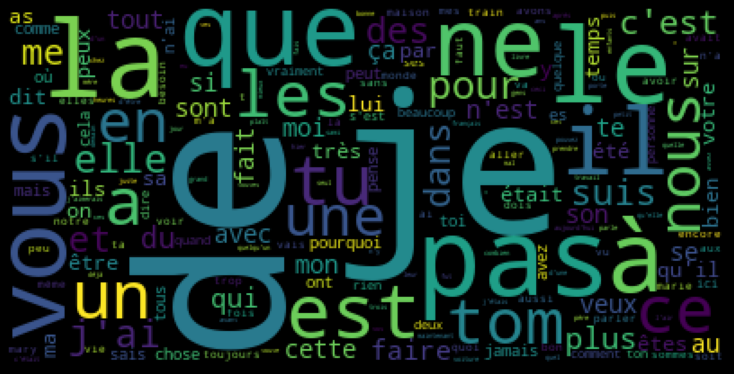

In [ ]:
# French word cloud

french_word_freq = french_tokenizer.word_counts
del french_word_freq["ssss"]
del french_word_freq["dddd"]
word_cloud = WordCloud().generate_from_frequencies(frequencies=french_word_freq)
plt.figure(figsize = (10, 10), facecolor = 'k', edgecolor = 'k' ) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [ ]:
french_sentences.head(25)

0     SSSS Lorsqu'il a demandé qui avait cassé la fe...
1     SSSS Lorsqu'il a demandé qui avait cassé la fe...
2                 SSSS Je ne supporte pas ce type. DDDD
3                 SSSS Je ne supporte pas ce type. DDDD
4                 SSSS Je ne supporte pas ce type. DDDD
5     SSSS Pour une fois dans ma vie je fais un bon ...
6      SSSS Ne tenez aucun compte de ce qu'il dit. DDDD
7                    SSSS Essayons quelque chose ! DDDD
8                     SSSS Qu'est-ce que tu fais ? DDDD
9                       SSSS Qu'est-ce que c'est ? DDDD
10                      SSSS Qu'est-ce que c'est ? DDDD
11                      SSSS Qu'est-ce que c'est ? DDDD
12    SSSS Aujourd'hui nous sommes le 18 juin et c'e...
13              SSSS Joyeux anniversaire Muiriel ! DDDD
14               SSSS Muiriel a 20 ans maintenant. DDDD
15               SSSS Muiriel a 20 ans maintenant. DDDD
16           SSSS Le mot de passe est « Muiriel ». DDDD
17                SSSS Je serai bientôt de retou

In [ ]:
print(french_sequences[0:10])

[[2, 1163, 16, 282, 36, 122, 945, 7, 551, 86, 20, 958, 80, 222, 17, 2100, 2086, 3], [2, 1163, 16, 282, 36, 122, 945, 7, 551, 86, 20, 958, 80, 222, 17, 2100, 2086, 3], [2, 5, 12, 2193, 6, 18, 846, 3], [2, 5, 12, 2193, 6, 18, 846, 3], [2, 5, 12, 2193, 6, 18, 846, 3], [2, 24, 23, 128, 31, 60, 135, 5, 154, 17, 126, 6318, 29, 37, 12, 1461, 10, 98, 3], [2, 12, 1806, 286, 443, 4, 18, 53, 62, 3], [2, 2442, 99, 2700, 3], [2, 206, 18, 9, 15, 12936, 3], [2, 206, 18, 9, 32, 3]]


In [ ]:
# reducing the size of english sentences

size_filter = 15

short_english_sequences = []
short_french_sequences = []

for i in range(len(french_sequences)):
  if len(french_sequences[i]) <= size_filter:
    short_english_sequences.append(english_sequences[i])
    short_french_sequences.append(french_sequences[i])

print(len(short_english_sequences))
print(len(short_french_sequences))


291600
291600


In [ ]:
print(short_english_sequences[5:10])

[[29, 20, 4, 175], [29, 7, 13], [29, 7, 15], [174, 15], [147, 7, 2853, 6751, 28, 13, 7, 10865, 663]]


In [ ]:
print(short_french_sequences[5:10])

[[2, 206, 18, 9, 15, 12936, 3], [2, 206, 18, 9, 32, 3], [2, 206, 18, 9, 32, 3], [2, 206, 18, 9, 32, 3], [2, 158, 21, 111, 8, 5671, 3449, 29, 32, 3571, 4, 1, 3]]


In [ ]:
# getting the new number of french and english tokens

new_eng_tokens = set()
new_french_tokens = set()

for seq in short_english_sequences:
  for token in seq:
    if token not in new_eng_tokens:
      new_eng_tokens.add(token)

for seq in short_french_sequences:
  for token in seq:
    if token not in new_french_tokens:
      new_french_tokens.add(token)

print("the reduced no. of english tokens are "+ str(len(new_eng_tokens)))
print("the reduced no. of french tokens are "+ str(len(new_french_tokens)))

the reduced no. of english tokens are 14743
the reduced no. of french tokens are 14973


In [ ]:
# A check to see whether there is a french sentence for every english sentence

assert len(french_sequences) == len(english_sequences), 'both the languages do not have equal no. of sentences'

In [ ]:
# A check to see whether there is a french sentence for every english sentence

assert len(short_french_sequences) == len(short_english_sequences), 'both the languages do not have equal no. of sentences'

In [ ]:
### doesn't seem to work with multiple runs ####

# train test splits

X = short_english_sequences
y = short_french_sequences

X_train_encoder_input, X_test_encoder_input, y_train, y_test = train_test_split(X, y, test_size = 0.1)

# preprocessing training data for decoder

print(y_train[0:5])

# remove END token from decoder input data
y_train_decoder_input = [seq[:-1] for seq in y_train]
print(y_train_decoder_input[0:5])

# remove START token from decoder target data
y_train_decoder_target = [seq[1:] for seq in y_train]
print(y_train_decoder_target[0:5])


#y_test = pad_sequences(y_test, padding = 'post')

y_test_decoder_target = [seq[1:] for seq in y_test]


[[2, 14, 18, 9, 2455, 14, 131, 221, 3], [2, 42, 968, 39, 1, 52, 8, 3760, 29, 8, 1, 3], [2, 90, 406, 11, 4, 148, 1, 32, 3], [2, 322, 54, 3], [2, 5, 894, 8, 506, 34, 998, 4, 1710, 3]]
[[2, 14, 18, 9, 2455, 14, 131, 221], [2, 42, 968, 39, 1, 52, 8, 3760, 29, 8, 1], [2, 90, 406, 11, 4, 148, 1, 32], [2, 322, 54], [2, 5, 894, 8, 506, 34, 998, 4, 1710]]
[[14, 18, 9, 2455, 14, 131, 221, 3], [42, 968, 39, 1, 52, 8, 3760, 29, 8, 1, 3], [90, 406, 11, 4, 148, 1, 32, 3], [322, 54, 3], [5, 894, 8, 506, 34, 998, 4, 1710, 3]]


In [ ]:
# padding sequences
X_train_encoder_input = pad_sequences(X_train_encoder_input, padding='post')
X_test_encoder_input = pad_sequences(X_test_encoder_input, padding =  'post')

y_train_decoder_input = pad_sequences(y_train_decoder_input, padding='post')        # This an ndimensional numpy array
y_train_decoder_target = pad_sequences(y_train_decoder_target, padding = 'post')

y_test_decoder_target = pad_sequences(y_test_decoder_target, padding='post')

As the memory is small to hold all of the one-hot vector notation of the data, we will use *tf.data* which streams data while training to prevent RAM crashes. 

In [ ]:
# << incase of any very low accuracy check this part >>

def one_hot_eng(x):
  return tf.one_hot(x, depth = n_eng_unique)

def one_hot_french(x):
  return tf.one_hot(x, depth = n_french_unique)

num_threads = 4
batch_size = 32

encoder_decoder_input_dataset = tf.data.Dataset.from_tensor_slices((X_train_encoder_input, y_train_decoder_input))

y_train_decoder_target_dataset = tf.data.Dataset.from_tensor_slices(y_train_decoder_target)
y_train_decoder_target_dataset = y_train_decoder_target_dataset.map(lambda x: one_hot_french(x),
                                        num_parallel_calls=num_threads)

training_dataset = tf.data.Dataset.zip((encoder_decoder_input_dataset, y_train_decoder_target_dataset)).batch(batch_size).prefetch(1)



In [ ]:
from tensorflow import keras
from keras.models import Sequential, Model, load_model
from keras.layers import RNN, LSTM, GRU, SimpleRNN, Input
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
# Encoder

embed_dim = 128

units = 128

encoder_input = tf.keras.layers.Input(shape = (None, ))

#  Bidirectional wrapper ?

eng_embedding_output = tf.keras.layers.Embedding(input_dim = n_eng_unique, #num_eng_tokens,
                                                 output_dim = embed_dim,
                                                 mask_zero = True)(encoder_input) 

# dropout ?
encoder_outputs, encoder_h, encoder_c = tf.keras.layers.LSTM(units,return_state = True)(eng_embedding_output)
encoder_states = [encoder_h, encoder_c]

In [ ]:
# Training Decoder 

decoder_input = tf.keras.layers.Input(shape=(None,))

french_embedding_layer = tf.keras.layers.Embedding(input_dim = n_french_unique, #num_french_tokens,
                                                    output_dim = embed_dim,
                                                    mask_zero = True)

french_embedding_output = french_embedding_layer(decoder_input)

decoder_lstm_1 = tf.keras.layers.LSTM(units, return_sequences=True, return_state = True)

decoder_out, _ , _ =  decoder_lstm_1(french_embedding_output, initial_state=encoder_states)

decoder_dense = tf.keras.layers.Dense(n_french_unique, #num_french_tokens, 
                                    activation='softmax')

decoder_out = decoder_dense(decoder_out)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, None, 128)    1920000     ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, None, 128)    1920000     ['input_2[0][0]']                
                                                                                              

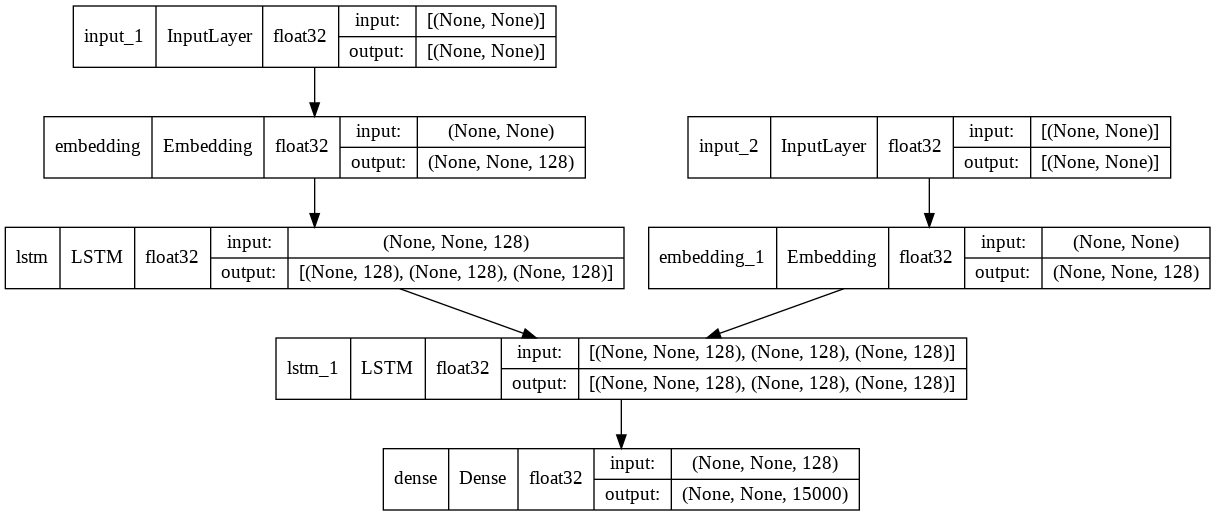

In [ ]:
# Model

model = tf.keras.models.Model(inputs=[encoder_input, decoder_input],
              outputs=[decoder_out])

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.CategoricalAccuracy()])
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True)

**Hyper parameters to tune**

*  length of vocabulary
*  length of English or French sentence
*  Embedding Layer dimensions
*  units in Lstm
*  Training epochs


In [ ]:
%%time

#steps_per_epoch = num_examples//BATCH_SIZE


history = model.fit( training_dataset,
           batch_size=batch_size,
           epochs=10,
          #steps_per_epoch = steps_per_epoch
           )

Epoch 1/10
8202/8202 [==============================] - 515s 61ms/step - loss: 2.1293 - categorical_accuracy: 0.3494
Epoch 2/10
8202/8202 [==============================] - 474s 58ms/step - loss: 1.3795 - categorical_accuracy: 0.5084
Epoch 3/10
8202/8202 [==============================] - 475s 58ms/step - loss: 1.0735 - categorical_accuracy: 0.5877
Epoch 4/10
8202/8202 [==============================] - 474s 58ms/step - loss: 0.8938 - categorical_accuracy: 0.6365
Epoch 5/10
8202/8202 [==============================] - 472s 58ms/step - loss: 0.7787 - categorical_accuracy: 0.6700
Epoch 6/10
8202/8202 [==============================] - 474s 58ms/step - loss: 0.6981 - categorical_accuracy: 0.6951
Epoch 7/10
8202/8202 [==============================] - 479s 58ms/step - loss: 0.6378 - categorical_accuracy: 0.7151
Epoch 8/10
8202/8202 [==============================] - 488s 60ms/step - loss: 0.5904 - categorical_accuracy: 0.7322
Epoch 9/10
8202/8202 [==============================] - 490s 60m

dict_keys(['loss', 'categorical_accuracy'])


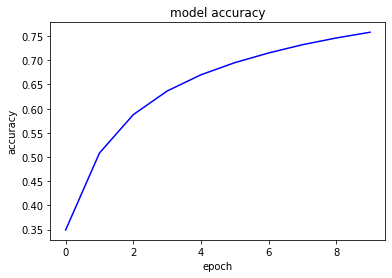

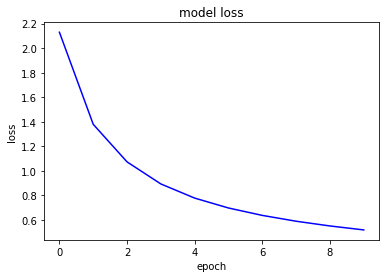

In [ ]:
# plots


print(history.history.keys())

plt.plot(history.history['categorical_accuracy'], 'b')
# plt.plot(history.history['val_accuracy'], 'r')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'], 'b')
# plt.plot(history.history['val_loss'], 'r')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# The decoder architecture of the model and the way data is fed to the model is different during training and testing,
# so we can't get validation accuracy during the training.


encoder_model = Model(encoder_input, encoder_states)

test_decoder_input = tf.keras.layers.Input(shape=(None,))
test_decoder_state_input_h = Input(shape = (units,))
test_decoder_state_input_c = Input(shape = (units,))

test_decoder_state_inputs = [test_decoder_state_input_h, test_decoder_state_input_c]

test_embeddings = french_embedding_layer(test_decoder_input)

test_decoder_out, test_state_h , test_state_c =  decoder_lstm_1(test_embeddings, initial_state=test_decoder_state_inputs)
test_decoder_states = [test_state_h, test_state_c]

test_decoder_output = decoder_dense(test_decoder_out)

test_decoder_model = Model([test_decoder_input] + test_decoder_state_inputs,
                      [test_decoder_output] + test_decoder_states)

In [ ]:
encoder_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 128)         1920000   
                                                                 
 lstm (LSTM)                 [(None, 128),             131584    
                              (None, 128),                       
                              (None, 128)]                       
                                                                 
Total params: 2,051,584
Trainable params: 2,051,584
Non-trainable params: 0
_________________________________________________________________


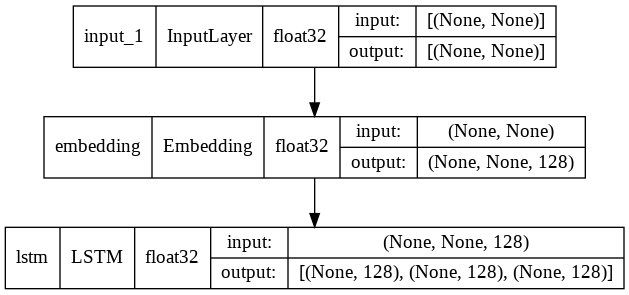

In [ ]:
tf.keras.utils.plot_model(encoder_model, show_shapes = True, show_dtype = True)

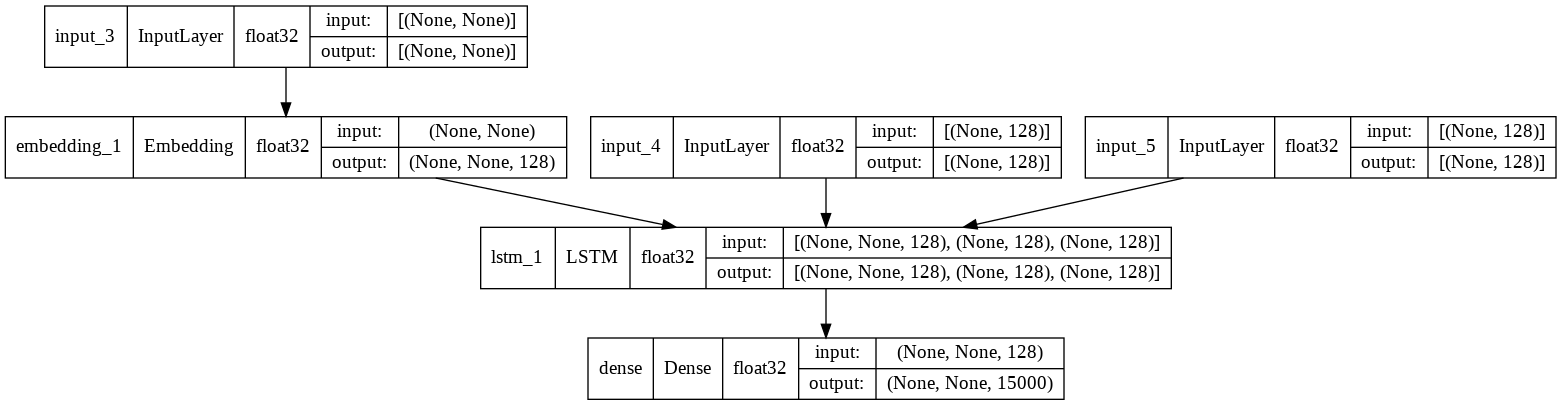

In [ ]:
tf.keras.utils.plot_model(test_decoder_model, show_shapes=True, show_dtype=True)

In [ ]:
acc_calculator = tf.keras.metrics.CategoricalAccuracy()

def test_data_cumm_accuracy(input_data, target_data, n_samples):
  len_seq = len(target_data[0])
  accuracies_sum = 0
  print("the number of samples being tested "+ str(n_samples))
  print("The padded length of each sequence is " + str(len_seq))
  for i in range(n_samples):
    in_seq = input_data[i]
    in_seq = np.expand_dims(in_seq, axis = 0)

    state_values = encoder_model.predict(in_seq)
    
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = french_word_index["ssss"]
    target_seq = np.expand_dims(target_seq, axis = 0)
    
    pred_tokens_list = []

    pred_seq_vectors = np.zeros((len_seq, n_french_unique))

    last_non_zero_indx = 0
    flag_set = False

    for j in range(len_seq):
      if target_data[i][j] == 0 and flag_set == False:
        last_non_zero_indx = j
        flag_set = True

      pred_token_vector, state_h, state_c = test_decoder_model.predict([target_seq] + state_values)
      
      pred_seq_vectors[j,] = pred_token_vector
      
      pred_token = np.argmax(pred_token_vector[0, -1, :])
      pred_tokens_list.append(pred_token)

      target_seq = np.zeros((1, 1))   
      #print(str(pred_token) +" "+ str(target_data[i][j]))
      target_seq[0, 0] = pred_token
      target_seq = np.expand_dims(target_seq, axis = 0)
      state_values = [state_h, state_c]
    
    # print("===========")
    # for k in range(last_non_zero_indx):
    #   print(str(pred_tokens_list[k]) + "   " + str(target_data[i][k]))
    # print("===========")
    # print("")
    
    tar_seq_vectors = tf.one_hot(target_data[i][0:last_non_zero_indx], depth = n_french_unique)
    pred_seq_vectors = pred_seq_vectors[0:last_non_zero_indx]
    pred_seq_vectors = tf.convert_to_tensor(pred_seq_vectors)
    acc_calculator.update_state(pred_seq_vectors, tar_seq_vectors)
    acc = acc_calculator.result().numpy()
    accuracies_sum += acc

  return accuracies_sum

In [ ]:
%%time

n_samples = 1000
test_data_cumm_acc = test_data_cumm_accuracy(X_train_encoder_input,
                                             y_train_decoder_target, n_samples)
test_data_accuracy = test_data_cumm_acc/n_samples
print("The TRAIN dataset accuracy with testing architecture is " + str(test_data_accuracy))


the number of samples being tested 1000
The padded length of each sequence is 14
The TRAIN dataset accuracy with testing architecture is 0.5106802772283554
CPU times: user 15min 47s, sys: 37.5 s, total: 16min 24s
Wall time: 15min 58s


In [ ]:
%%time


n_samples = 1000
test_data_cumm_acc = test_data_cumm_accuracy(X_test_encoder_input, y_test_decoder_target, n_samples)
test_data_accuracy = test_data_cumm_acc/n_samples
print("The TEST dataset accuracy with testing architecture is " + str(test_data_accuracy))

the number of samples being tested 1000
The padded length of each sequence is 14
The TEST dataset accuracy with testing architecture is 0.4964044844508171
CPU times: user 15min 37s, sys: 38.4 s, total: 16min 15s
Wall time: 15min 40s


In [ ]:
def translate(eng_text):
  
  #convert text to tokens
  english_sequences = eng_tokenizer.texts_to_sequences(eng_text)         # This is a list
  #pad english the tokens
  padded_english_sequences = pad_sequences(english_sequences, padding='post')
  in_seq = np.expand_dims(padded_english_sequences, axis = 0)
  
  state_values = encoder_model.predict(in_seq)
  target_seq = np.zeros((1, 1))
  target_seq[0, 0] = french_word_index["ssss"]
  target_seq = np.expand_dims(target_seq, axis = 0)

  #stop = False
  french_sentence = ""
  for _ in range(3):
    
    pred_token_vector, state_h, state_c = test_decoder_model.predict([target_seq] + state_values)
    
    pred_token = np.argmax(pred_token_vector[0, -1, :])
    pred_word = french_reverse_index[pred_token]

    if pred_token == 3:
      break

    french_sentence = french_sentence + "  " + pred_word

    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = pred_token
    target_seq = np.expand_dims(target_seq, axis = 0)
    state_values = [state_h, state_c]

  return french_sentence      

In [ ]:
sample_eng_sentence = "I am"
print("The english sentence is: "+str(sample_eng_sentence))
translated_french_sentence = translate(sample_eng_sentence)
print("The translated French Sentence is: " + translated_french_sentence)

The english sentence is: I am
The translated French Sentence is:   je  <OOVF


In [ ]:
# plots of data 

In [ ]:
# saves architecture, weights and compilation parameters


model.save("/content/my_model")

In [ ]:
!zip -r /content/my_model.zip /content/my_model

In [ ]:
!unzip /content/my_model.zip -d ../

In [ ]:
# # Recreate the exact same model purely from the file:
model = keras.models.load_model("/content/my_model")